In [1]:
import sys
sys.path.append('../src')  # desde notebooks/ hacia clases/

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ClasificadorSupervisado import ClasificadorSupervisado


1.- Realizar un análisis exploratorio de los datos para comprender las características y la distribución de los datos.

2.- Preprocesar los datos, incluyendo la limpieza, la transformación y la normalización de las características según sea necesario.

In [76]:
df = pd.read_excel("../data/raw/Telco-Customer-Churn.xlsx", sheet_name="Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [77]:
# DESCRIPCION DE LA TABLA:

# Obtener los tipos de datos
data_types = df.dtypes

# Obtener los valores únicos para las variables categóricas (object o bool)
value_types = {
    col: df[col].unique().tolist() if df[col].dtype == 'object' else None
    for col in df.columns
}

# Traducir los nombres de las columnas al español (traducción manual)
traducciones = {
    "customerID": "ID del cliente",
    "gender": "Género",
    "SeniorCitizen": "Adulto mayor",
    "Partner": "Tiene pareja",
    "Dependents": "Tiene dependientes",
    "tenure": "Meses de permanencia",
    "PhoneService": "Servicio telefónico",
    "MultipleLines": "Líneas múltiples",
    "InternetService": "Servicio de Internet",
    "OnlineSecurity": "Seguridad en línea",
    "OnlineBackup": "Respaldo en línea",
    "DeviceProtection": "Protección de dispositivos",
    "TechSupport": "Soporte técnico",
    "StreamingTV": "Streaming de TV",
    "StreamingMovies": "Streaming de películas",
    "Contract": "Tipo de contrato",
    "PaperlessBilling": "Factura electrónica",
    "PaymentMethod": "Método de pago",
    "MonthlyCharges": "Cargos mensuales",
    "TotalCharges": "Cargos totales",
    "Churn": "Abandono"
}

# Crear la tabla resumen
summary_df = pd.DataFrame({
    "Variable": df.columns,
    "Traducción": [traducciones.get(col, "") for col in df.columns],
    "Tipo de dato": data_types.values,
    "Valores posibles (si es categórica)": [value_types[col] for col in df.columns]
})

summary_df

,Variable,Traducción,Tipo de dato,Valores posibles (si es categórica)
0,customerID,ID del cliente,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,Género,object,"[Female, Male]"
2,SeniorCitizen,Adulto mayor,int64,None
3,Partner,Tiene pareja,object,"[Yes, No]"
4,Dependents,Tiene dependientes,object,"[No, Yes]"
5,tenure,Meses de permanencia,int64,None
6,PhoneService,Servicio telefónico,object,"[No, Yes]"
7,MultipleLines,Líneas múltiples,object,"[No phone service, No, Yes]"
8,InternetService,Servicio de Internet,object,"[DSL, Fiber optic, No]"
9,OnlineSecurity,Seguridad en línea,object,"[No, Yes, No internet service]"


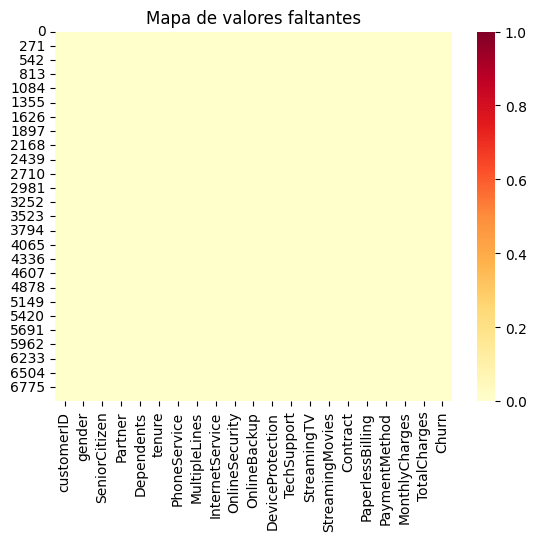

In [78]:
sns.heatmap(df.isnull(), cbar=True, cmap="YlOrRd")
plt.title("Mapa de valores faltantes")
plt.show()

In [79]:
# Valores Nulos
missing_values=df.apply(lambda x: sum(x.isnull()),axis=0)
print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [80]:
# Borrar filas con datos nulos
df.dropna(inplace=True, how="any")
# Verificar Valores Nulos
missing_values=df.apply(lambda x: sum(x.isnull()),axis=0)
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [81]:
# Tipos de Datos y No Nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [82]:
df = df.astype({
    'customerID': 'string',
    'SeniorCitizen': 'int',
    'tenure': 'int',
    'MonthlyCharges': 'float',
    'TotalCharges': 'float'
})

df_data = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'], prefix_sep='_', drop_first=True, dtype=int)
df_processed= pd.get_dummies(df_data, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], prefix_sep='_', drop_first=False, dtype=int)
# Tipos de Datos y No Nulos
print(df_processed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   string 
 1   SeniorCitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   gender_Male                              7032 non-null   int64  
 6   Partner_Yes                              7032 non-null   int64  
 7   Dependents_Yes                           7032 non-null   int64  
 8   PhoneService_Yes                         7032 non-null   int64  
 9   PaperlessBilling_Yes                     7032 non-null   int64  
 10  Churn_Yes                                7032 non-nul

In [83]:
df_processed

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,0,1,1,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1


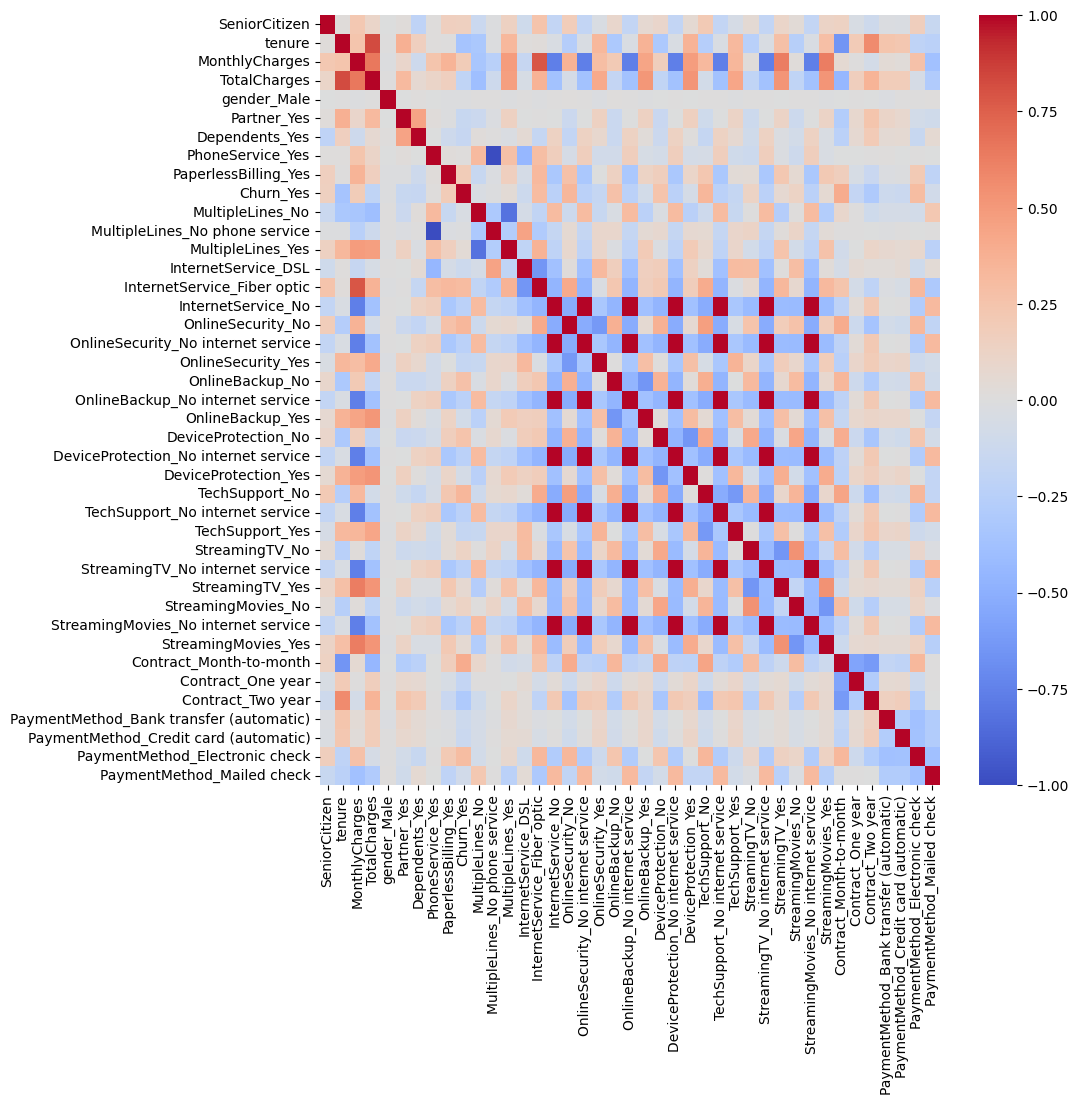

In [84]:
df_processed_numeric = df_processed.drop('customerID', axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(df_processed_numeric.corr(), annot=False, cmap='coolwarm')
plt.show()

In [85]:
# Se eliminan las columnas con información redundante
df_processed = df_processed.drop(['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis=1)
df_processed

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,1,1,1,1,1,...,1,0,1,0,1,0,0,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,0,1,1,1,1,...,1,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,0,1,1,...,0,1,0,1,0,0,0,0,0,1


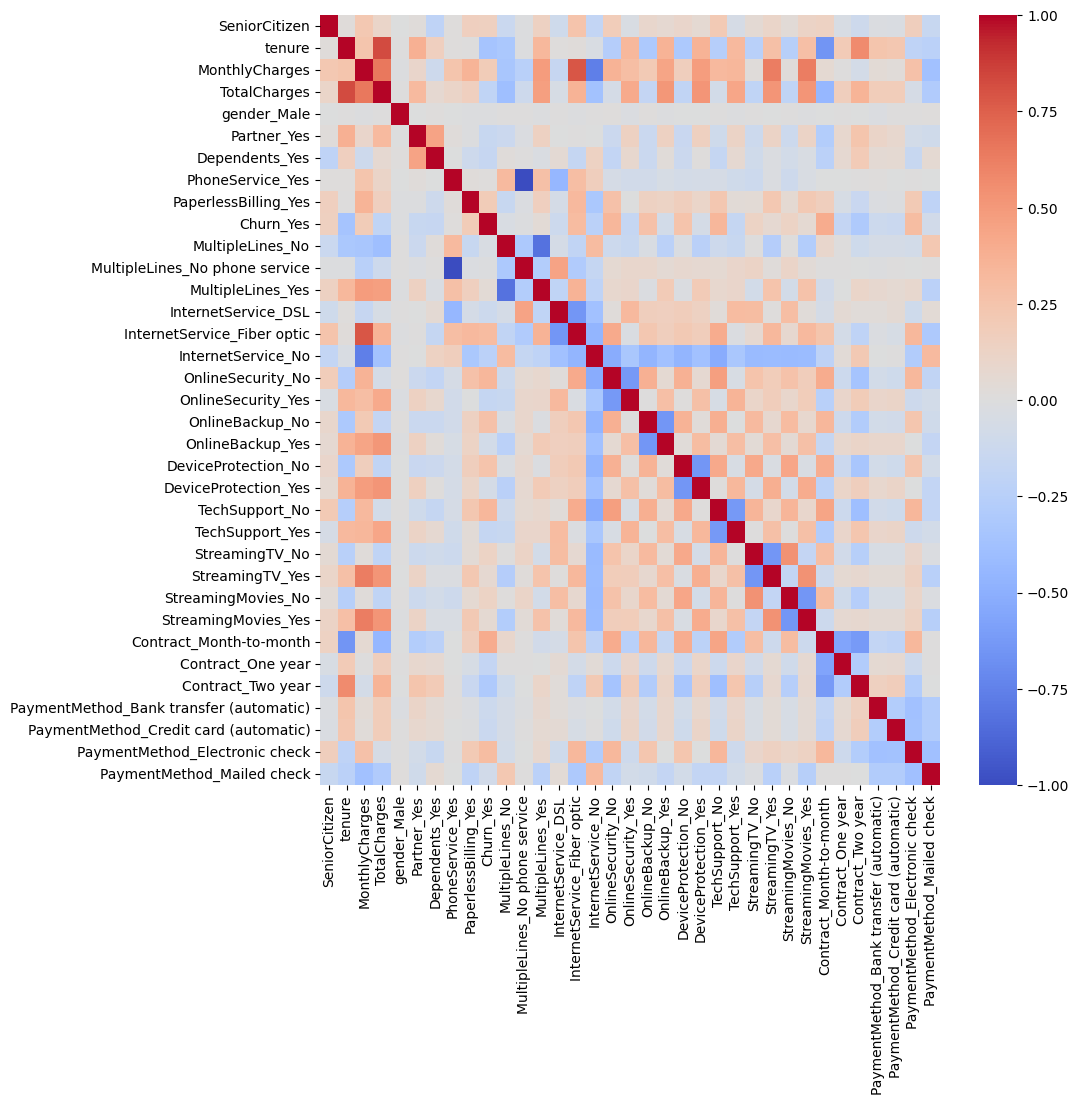

In [86]:
df_processed_numeric = df_processed.drop('customerID', axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(df_processed_numeric.corr(), annot=False, cmap='coolwarm')
plt.show()

In [87]:
df_processed_numeric.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,0.156258,0.150541,...,0.105445,0.034196,0.119842,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,0.004823,-0.354049,...,0.280264,-0.252890,0.285402,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,0.351930,0.192858,...,0.629668,0.017271,0.627235,0.058933,0.004810,-0.073256,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,0.157830,-0.199484,...,0.515709,-0.202605,0.519867,-0.446776,0.170569,0.358036,0.186119,0.182663,-0.060436,-0.294708
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,-0.011902,-0.008545,...,-0.007124,0.006078,-0.010105,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.013957,-0.149982,...,0.124483,-0.117488,0.118108,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,-0.110131,-0.163128,...,-0.016499,-0.078245,-0.038375,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,0.016696,0.011691,...,-0.021383,-0.111273,-0.033477,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
PaperlessBilling_Yes,0.156258,0.004823,0.351930,0.157830,-0.011902,-0.013957,-0.110131,0.016696,1.000000,0.191454,...,0.224241,0.058987,0.211583,0.168296,-0.052278,-0.146281,-0.017469,-0.013726,0.208427,-0.203981
Churn_Yes,0.150541,-0.354049,0.192858,-0.199484,-0.008545,-0.149982,-0.163128,0.011691,0.191454,1.000000,...,0.063254,0.130920,0.060860,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773


In [89]:
df_processed.to_excel('../data/processed/Telco-Customer-Churn_processed.xlsx', sheet_name='Processed', index=False, engine='openpyxl')

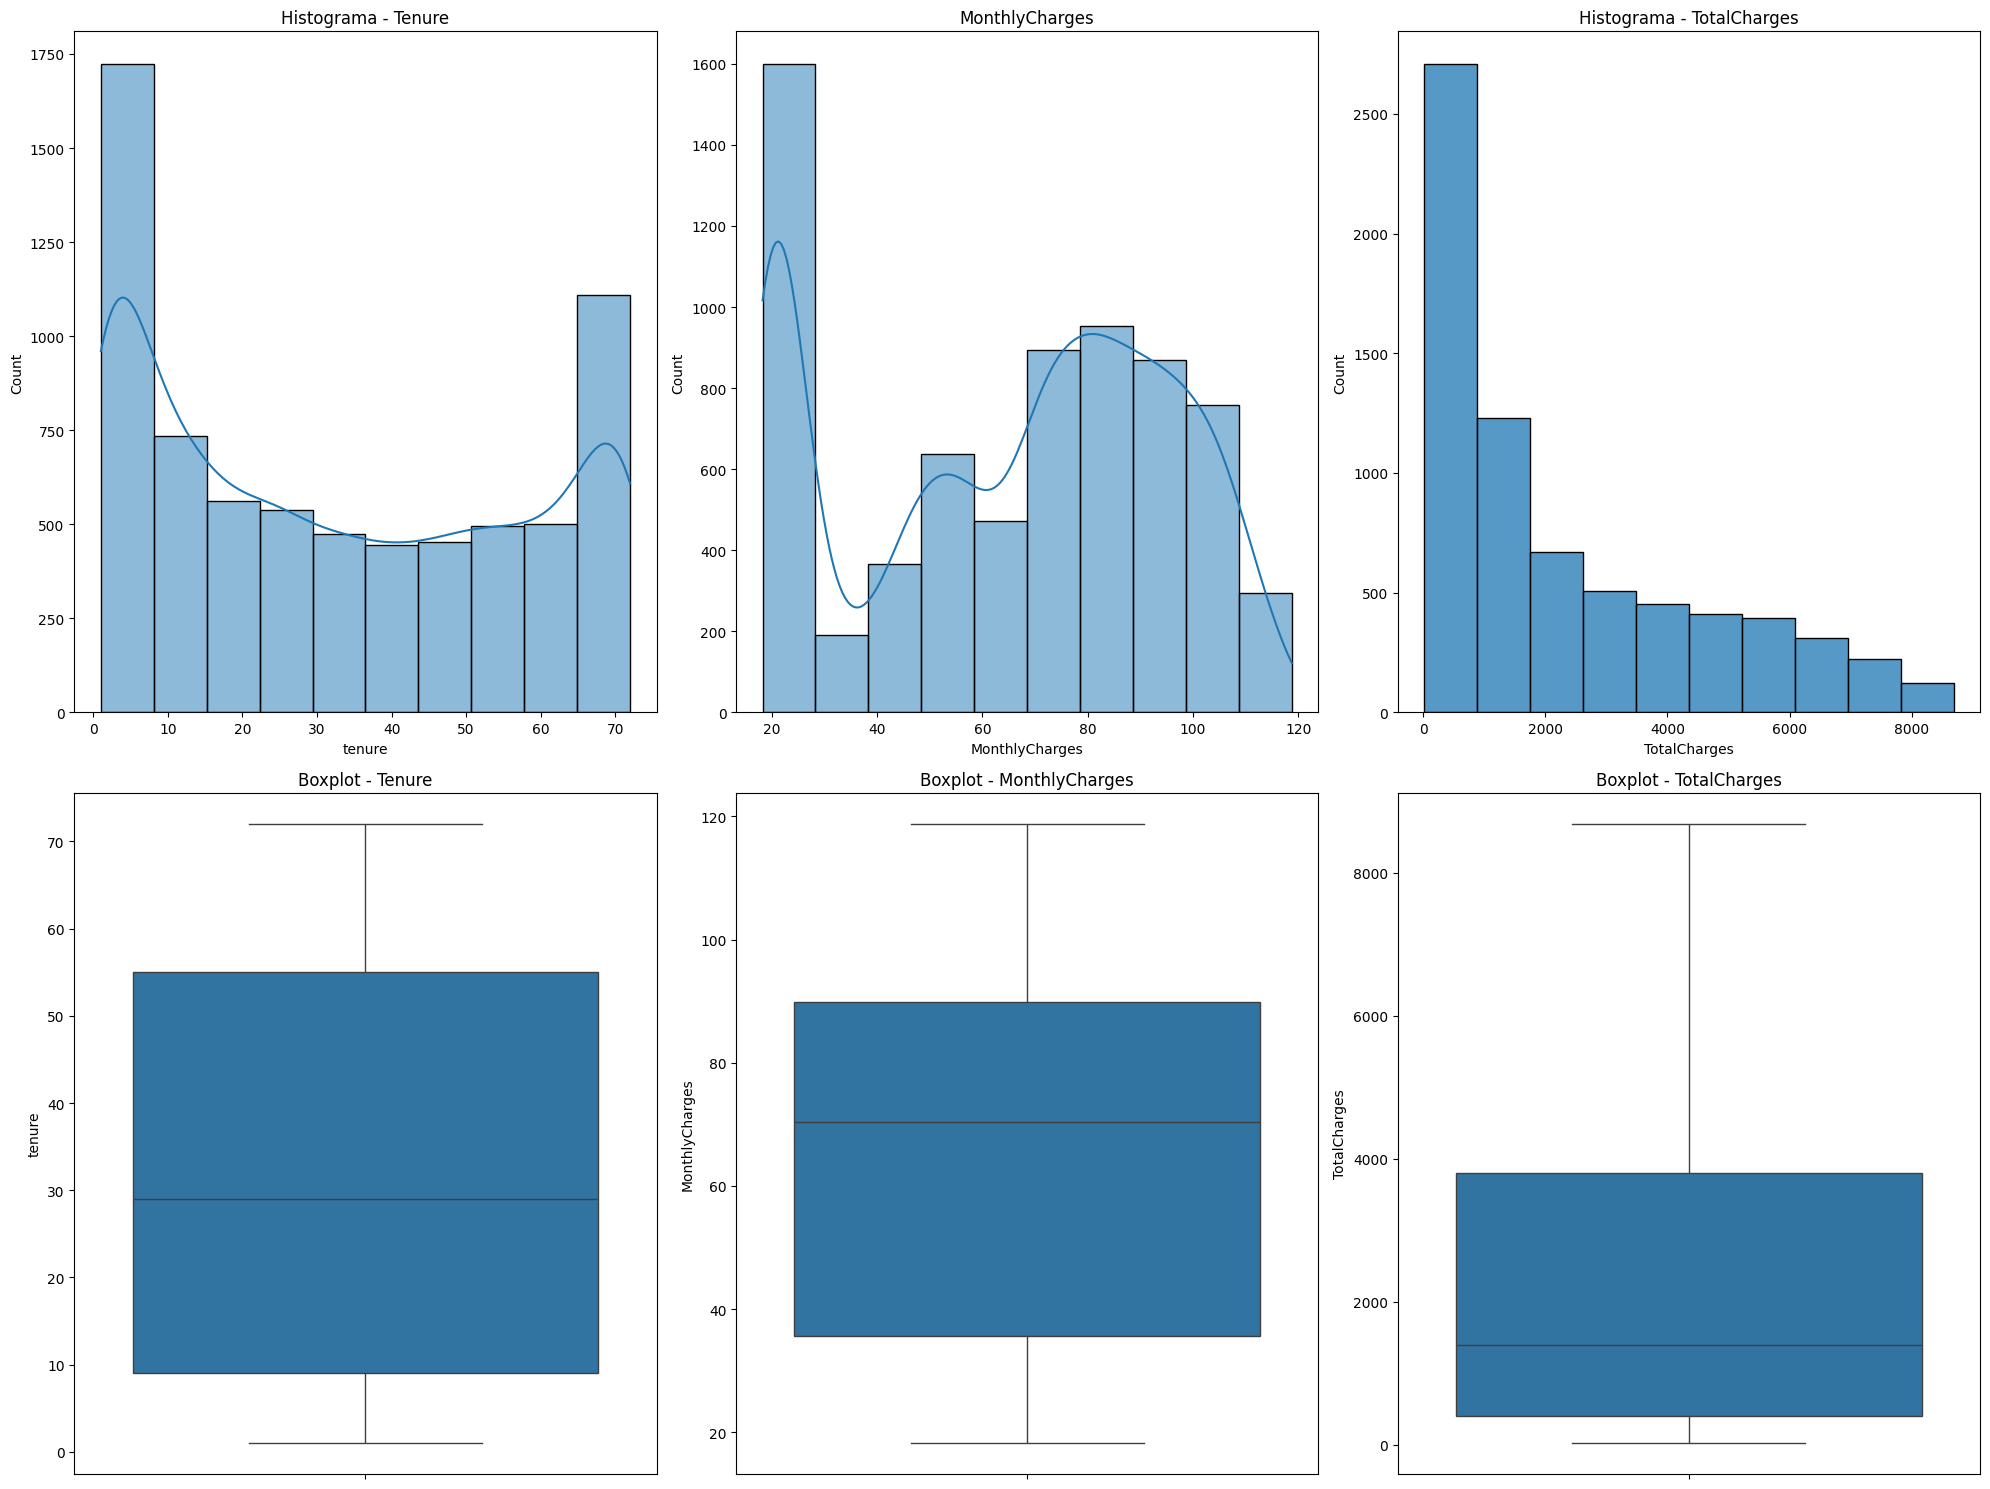

In [92]:
# Vamos a graficar las variables numéricas discretas o continuas

# Crear una figura con 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Gráfico 1 Histograma - Tenure
sns.histplot(x="tenure", data=df_processed, kde=True, bins=10, stat="count", ax=axes[0, 0])
axes[0,0].set_title('Histograma - Tenure')

# Gráfico 2 Histograma - MonthlyCharges
sns.histplot(x='MonthlyCharges', data=df_processed, kde=True, bins=10, stat="count", ax=axes[0, 1])
axes[0,1].set_title('MonthlyCharges')

# Gráfico 3 Histograma - TotalCharges
sns.histplot(x='TotalCharges', data=df_processed, kde=False, bins=10, stat="count", ax=axes[0, 2])
axes[0,2].set_title('Histograma - TotalCharges')

# Gráfico 4 Boxplot - Tenure
sns.boxplot(data=df_processed, y="tenure", ax=axes[1, 0])
axes[1,0].set_title('Boxplot - Tenure')

# Gráfico 5 Boxplot - MonthlyCharges
sns.boxplot(data=df_processed, y="MonthlyCharges", ax=axes[1, 1])
axes[1,1].set_title('Boxplot - MonthlyCharges')

# Gráfico 6 Boxplot - TotalCharges
sns.boxplot(data=df_processed, y="TotalCharges", ax=axes[1, 2])
axes[1,2].set_title('Boxplot - TotalCharges')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

In [93]:
# Vamos a escalar las variables numéricas

# Columnas a escalar
cols_a_escalar = ["tenure", "MonthlyCharges", "TotalCharges"]

# Inicializar el escalador
scaler = StandardScaler()

# Escalar solo las columnas deseadas
df_processed_scaled = df_processed.copy()
df_processed_scaled[cols_a_escalar] = scaler.fit_transform(df_processed[cols_a_escalar])
df_processed_scaled

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,-1.280248,-1.161694,-0.994194,0,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0.064303,-0.260878,-0.173740,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,-1.239504,-0.363923,-0.959649,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0.512486,-0.747850,-0.195248,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,0,-1.239504,0.196178,-0.940457,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,-0.343137,0.664868,-0.129180,1,1,1,1,1,...,1,0,1,0,1,0,0,0,0,1
7039,2234-XADUH,0,1.612573,1.276493,2.241056,0,1,1,1,1,...,1,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,0,-0.872808,-1.170004,-0.854514,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,-1.158016,0.319168,-0.872095,1,1,0,1,1,...,0,1,0,1,0,0,0,0,0,1


In [94]:
df_processed_scaled.to_excel('../data/processed/Telco-Customer-Churn_processed_scaled.xlsx', sheet_name='Processed', index=False, engine='openpyxl')

3.- Dividir los datos en conjuntos de entrenamiento y prueba.

In [99]:
y = df_processed_scaled[["Churn_Yes"]]
y

,Churn_Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [100]:
X = df_processed_scaled.drop(['customerID', 'tenure'], axis=1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.161694,-0.994194,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,-0.260878,-0.173740,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,-0.363923,-0.959649,1,0,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
3,0,-0.747850,-0.195248,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0.196178,-0.940457,0,0,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.664868,-0.129180,1,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
7039,0,1.276493,2.241056,0,1,1,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0
7040,0,-1.170004,-0.854514,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,0.319168,-0.872095,1,1,0,1,1,1,0,...,0,1,0,1,0,0,0,0,0,1


In [101]:
y.to_excel('../data/processed/Data_y.xlsx', sheet_name='Data_y', index=False, engine='openpyxl')
X.to_excel('../data/processed/Data_X.xlsx', sheet_name='Data_X', index=False, engine='openpyxl')

4.- Entrenar al menos 3 algoritmos y optimizar sus hiperparametros

5.- Evaluar el rendimiento de los modelos utilizando métricas de evaluación pertinentes, como precisión, sensibilidad, valor F1, entre otras.

In [ ]:
Clasificador = ClasificadorSupervisado()

X_array = X.to_numpy()
y_array = y.to_numpy()

# Vamos a crear Folds
Clasificador.crear_folds(metodo='stratified_kfold', k=5, random_state=42)

hiperparametros_datos= {
    'knn': {'n_neighbors': 3, 'weights': 'distance'},
    'log_reg': {'penalty': 'l2', 'C': 1.0, 'solver': 'lbfgs'},
    'tree': {'max_depth': 5, 'criterion': 'gini'},
    'rf': {},
    'nb': {}
}

Clasificador.entrenar_modelos(hiperparametros=hiper_datos)

{'fold_1': {'X_train': array([[ 0.        , -1.16169394, -0.99419409, ...,  0.        ,
           1.        ,  0.        ],
         [ 0.        , -0.26087792, -0.17373982, ...,  0.        ,
           0.        ,  1.        ],
         [ 0.        , -0.74785042, -0.19524771, ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  1.27649259,  2.24105565, ...,  1.        ,
           0.        ,  0.        ],
         [ 0.        , -1.17000405, -0.85451414, ...,  0.        ,
           1.        ,  0.        ],
         [ 1.        ,  0.31916782, -0.87209546, ...,  0.        ,
           0.        ,  1.        ]], shape=(5625, 34)),
  'y_train': array([[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [1]], shape=(5625, 1)),
  'X_val': array([[ 0.        , -0.36392329, -0.95964911, ...,  0.        ,
           0.        ,  1.        ],
         [ 0.        , -0.49356102, -0.74818796, ...,  0.        ,
           0.